In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
data = pd.read_csv("Walmart.csv")

In [5]:
df = pd.DataFrame(data)

In [7]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [15]:
print(df.columns)


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [23]:
import pandas as pd

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract Year, Month, Day, Day of Week, Week of Year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
print(df.head())


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment    Date_Int  Year  Month  Day  
0  211.096358         8.106  1265328000  2010      2    5  
1  211.242170         8.106  1265932800  2010      2   12  
2  211.289143         8.106  1266537600  2010      2   19  
3  211.319643         8.106  1267142400  2010      2   26  
4  211.350143         8.106  1267747200  2010      3    5  


In [37]:
df = df.drop('Date_Int', axis = 1)

In [39]:
df = df.drop('Date', axis = 1)

In [41]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [45]:
from sklearn.model_selection import train_test_split

# Split your features (X) and target variable (y) before applying get_dummies
X = df.drop('Weekly_Sales', axis=1)  # Feature columns
y = df['Weekly_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply One-Hot Encoding on X_train and X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure X_train and X_test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [47]:
print(X_train.shape, y_train.shape)


(4504, 9) (4504,)


In [49]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 269775900356.0254


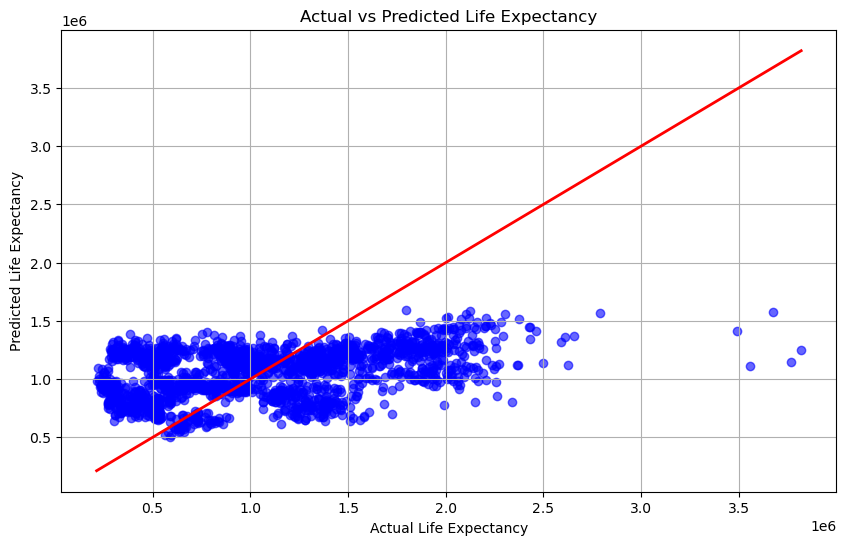

In [53]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # line of perfect prediction
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid(True)
plt.show()

In [63]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix['Weekly_Sales']


Store          -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Year           -0.018378
Month           0.076143
Day            -0.017409
Name: Weekly_Sales, dtype: float64

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select important features based on correlation
X_selected = df[['Store', 'Month']]  # Using 'Store' and 'Month' based on your correlation analysis
y = df['Weekly_Sales']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor()

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Model (with selected features) - MSE: {mse}")


Random Forest Model (with selected features) - MSE: 21167860631.192123


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select important features based on correlation
X_selected = df[['Store', 'Month']]  # Using 'Store' and 'Month' based on your correlation analysis
y = df['Weekly_Sales']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with hyperparameter tuning
rf_model = RandomForestRegressor(
    n_estimators=200,        # Increase number of trees
    max_depth=10,            # Limit tree depth to prevent overfitting
    min_samples_split=10,    # Require at least 10 samples to split a node
    min_samples_leaf=5,      # Require at least 5 samples in a leaf node
    max_features='sqrt',     # Use the square root of the number of features
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Model (with hyperparameters) - MSE: {mse}")


Random Forest Model (with hyperparameters) - MSE: 73305142067.73637


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Select important features based on correlation
X_selected = df[['Store', 'Month']]  # You can later add more features like 'Temperature', 'Holiday_Flag', etc.
y = df['Weekly_Sales']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with adjusted hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=100,         # Reduce the number of trees
    max_depth=5,              # Reduce max depth for simpler trees
    min_samples_split=15,     # Require more samples to split a node
    min_samples_leaf=10,      # Require more samples in each leaf
    max_features='sqrt',      # Use the square root of the number of features
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Model (with adjusted hyperparameters) - MSE: {mse}")

# Cross-validation to get a better estimate of performance
cv_scores = cross_val_score(rf_model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores: {-cv_scores}")
print(f"Average MSE from Cross-validation: {-cv_scores.mean()}")


Random Forest Model (with adjusted hyperparameters) - MSE: 195811312149.2239
Cross-validation MSE scores: [6.77906630e+11 4.81829453e+11 4.39764415e+11 1.78749385e+11
 1.60152498e+11]
Average MSE from Cross-validation: 387680476346.2318
